In [1]:
import nltk

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

In [2]:
# df=pd.read_csv('Datasets/Bigmaincall.csv')
df = pd.read_csv("Datasets/MainCall.csv", sep=",", names=["label","message"])
df.head(100)

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
95,normal,Its a part of checking IQ.
96,normal,"Sorry my roommates took forever, it's ok if I ..."
97,normal,I plan to give on this month end.
98,normal,Wah lucky man... Then can save money... Hee...


In [3]:
df.head(5)

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [4]:
df.shape

(5925, 2)

In [5]:
df

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
5920,fraud,to get 1000 INR voucher please call on 8898655...
5921,fraud,to get free access of google cloud account hit...
5922,fraud,to get free AWS cloud account hit on given mes...
5923,fraud,to get free access of Microsoft Azure hit on g...


In [6]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5925 non-null   object
 1   message  5925 non-null   object
dtypes: object(2)
memory usage: 92.7+ KB


(None, (5925, 2))

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
# 1=ham    0= spam
df['label'] = encoder.fit_transform(df['label'])
df.head(5)

,label,message
0,0,"hello, i m bank manager of SBI, ur debit card ..."
1,0,Todays Vodafone numbers ending with 4882 are s...
2,1,Please don't say like that. Hi hi hi
3,1,Thank you!
4,1,Oh that was a forwarded message. I thought you...


In [9]:
df.isnull().sum()

label      0
message    0
dtype: int64

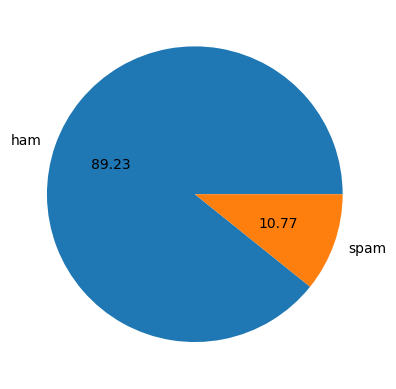

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
df.duplicated().sum()

314

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5611, 2)

# Exploratory Data Analysis

In [15]:
# after pie chart we find the data is imbalanced

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\US\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters']=df['message'].apply(len)

C:\Users\US\AppData\Local\Temp\ipykernel_3772\1098321106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


In [18]:
df

,label,message,num_characters
0,0,"hello, i m bank manager of SBI, ur debit card ...",97
1,0,Todays Vodafone numbers ending with 4882 are s...,148
2,1,Please don't say like that. Hi hi hi,36
3,1,Thank you!,10
4,1,Oh that was a forwarded message. I thought you...,63
...,...,...,...
5920,0,to get 1000 INR voucher please call on 8898655...,52
5921,0,to get free access of google cloud account hit...,73
5922,0,to get free AWS cloud account hit on given mes...,60
5923,0,to get free access of Microsoft Azure hit on g...,68


In [19]:
# number of words
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


C:\Users\US\AppData\Local\Temp\ipykernel_3772\85512025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [20]:
df

,label,message,num_characters,num_words
0,0,"hello, i m bank manager of SBI, ur debit card ...",97,24
1,0,Todays Vodafone numbers ending with 4882 are s...,148,27
2,1,Please don't say like that. Hi hi hi,36,10
3,1,Thank you!,10,3
4,1,Oh that was a forwarded message. I thought you...,63,15
...,...,...,...,...
5920,0,to get 1000 INR voucher please call on 8898655...,52,10
5921,0,to get free access of google cloud account hit...,73,15
5922,0,to get free AWS cloud account hit on given mes...,60,13
5923,0,to get free access of Microsoft Azure hit on g...,68,14


In [21]:
# df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5611.000000,5611.000000
mean,77.157548,18.090536
std,57.592317,13.150588
min,2.000000,1.000000
25%,35.000000,9.000000
50%,59.000000,14.000000
75%,110.000000,25.000000
max,910.000000,220.000000


<Axes: xlabel='num_characters', ylabel='Count'>

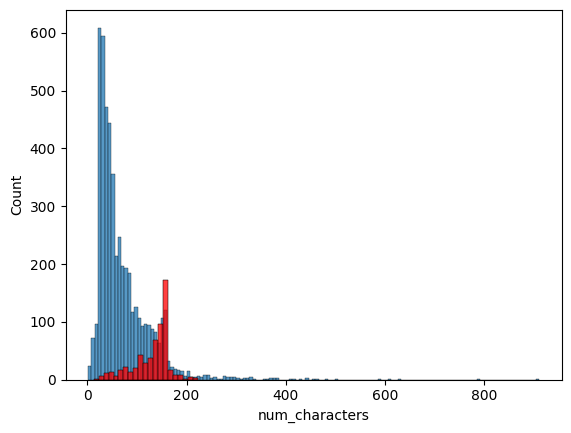

In [23]:
sns.histplot(df[df['label']==1]['num_characters'])
sns.histplot(df[df['label']==0]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

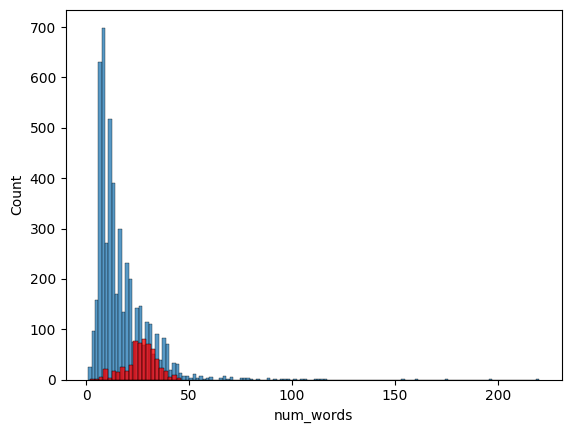

In [24]:
sns.histplot(df[df['label']==1]['num_words'])
sns.histplot(df[df['label']==0]['num_words'],color='red')

# Input Preprocessing 

In [25]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def remove_punctuation(self, text=''):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def remove_stopwords(self, text=''):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():
            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.remove_punctuation(text)
        words = self.remove_stopwords(message)
        return words
        

In [26]:
preprocess=PreProcessText()
text="hello#%&*^$# hello, kaise ho ji aa ppp maein... accha hu"
# preprocess.remove_punctuation(text)
# preprocess.remove_stopwords(text)
# preprocess.token_words(text)
# 


In [27]:
df['no_punctuation']=df["message"].apply(preprocess.remove_punctuation)

C:\Users\US\AppData\Local\Temp\ipykernel_3772\2005558460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_punctuation']=df["message"].apply(preprocess.remove_punctuation)


In [28]:
df.head()

,label,message,num_characters,num_words,no_punctuation
0,0,"hello, i m bank manager of SBI, ur debit card ...",97,24,hello i m bank manager of SBI ur debit card is...
1,0,Todays Vodafone numbers ending with 4882 are s...,148,27,Todays Vodafone numbers ending with 4882 are s...
2,1,Please don't say like that. Hi hi hi,36,10,Please dont say like that Hi hi hi
3,1,Thank you!,10,3,Thank you
4,1,Oh that was a forwarded message. I thought you...,63,15,Oh that was a forwarded message I thought you ...


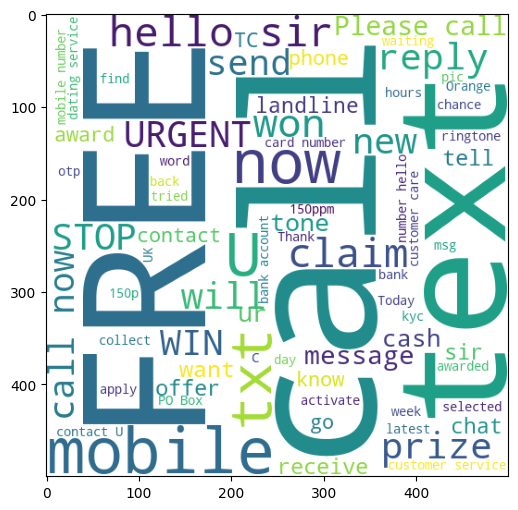

In [29]:
# 1=ham    0= spam
# normal call
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['label'] == 0]['no_punctuation'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

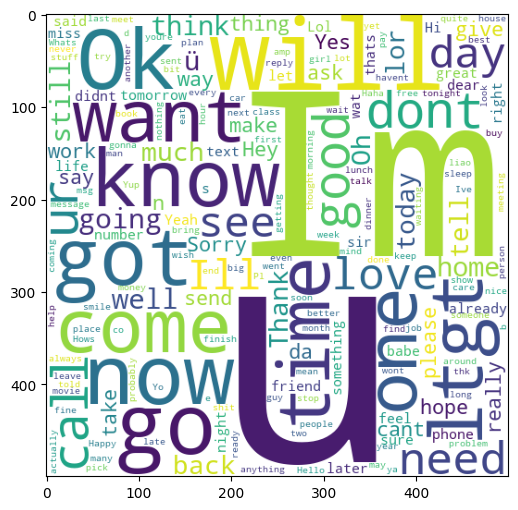

In [30]:
# 1=ham    0= spam
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['label'] == 1]['no_punctuation'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [31]:
spam_corpus = []
for msg in df[df['label'] == 0]['no_punctuation'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        # print(word)

len(spam_corpus)

13677

In [32]:
ham_corpus = []
for msg in df[df['label'] == 1]['no_punctuation'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        # print(word)

len(ham_corpus)

69637

In [33]:
len(spam_corpus)

13677

In [34]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,to,467
1,your,286
2,a,267
3,you,216
4,call,151
5,for,149
6,from,137
7,have,134
8,the,122
9,is,114


In [35]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0])

# Model Building

In [113]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [114]:
X = cv.fit_transform(df['no_punctuation']).toarray()
X.shape

(5611, 9463)

In [115]:
y=df['label'].values
y.shape

(5611,)

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [117]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [118]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9029385574354408
[[ 90  20]
 [ 89 924]]
0.9788135593220338


In [119]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9715048975957258
[[ 97  13]
 [ 19 994]]
0.9870903674280039


In [120]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9715048975957258
[[  85   25]
 [   7 1006]]
0.9757516973811833


# TFIDF

In [121]:
X = tfidf.fit_transform(df['no_punctuation']).toarray()
X.shape

(5611, 3000)

In [122]:
y=df['label'].values
y.shape

(5611,)

In [123]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [125]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8904719501335708
[[ 85  25]
 [ 98 915]]
0.973404255319149


In [126]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97506678539626
[[  82   28]
 [   0 1013]]
0.9731027857829011


In [127]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9830810329474622
[[  95   15]
 [   4 1009]]
0.9853515625


# Outcome: tfidf with BNB 

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XBGClassifier


In [129]:
svc=SVC(kernel='sigmoid',gamma=0.1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)


In [130]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':lrc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    
}

In [131]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)


    return accuracy,precision

In [132]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [133]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy ",current_accuracy)
    print("Precision ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy  0.9394479073909172
Precision  0.93790546802595
For KN
Accuracy  0.9341050756901158
Precision  0.9319227230910764
For NB
Accuracy  0.97506678539626
Precision  0.9731027857829011
For DT
Accuracy  0.9608192341941229
Precision  0.9645254074784276
For LR
Accuracy  0.9608192341941229
Precision  0.9645254074784276
For RF
Accuracy  0.9786286731967943
Precision  0.9768563162970106


c:\Users\US\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy  0.9679430097951914
Precision  0.9756572541382668
For Bgc
Accuracy  0.9768477292965272
Precision  0.9814634146341463
For ETC
Accuracy  0.981300089047195
Precision  0.9806201550387597
For GBDT
Accuracy  0.9617097061442564
Precision  0.9601518026565465


In [134]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [135]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.939448,0.937905
1,KN,0.934105,0.931923
2,NB,0.975067,0.973103
3,DT,0.960819,0.964525
4,LR,0.960819,0.964525
5,RF,0.978629,0.976856
6,AdaBoost,0.967943,0.975657
7,Bgc,0.976848,0.981463
8,ETC,0.981300,0.980620
9,GBDT,0.961710,0.960152


In [136]:
#3000- ETC(Extra tree classifier )
# 4000-ETC
#2000-etc

In [137]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(etc,open('model2.pkl','wb'))

In [149]:
# input
# 1=ham    0= spam
# input_message=("Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires")
# input_message=("Well i am definitely need to restock before thanksgiving, I'll let you know when I'm out")
input_message=("Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery")
# prediction_model=pickle.load(open('model.pkl','rb'))
# input_message=("# Hello, I am calling from  GeoCustomerCare and your credit card is going to decline by tomorrow itself.")
# pre process
obj=PreProcessText()
transform_message=obj.remove_punctuation(input_message)
# vectorise
tfidf=pickle.load(open('vectorizer2.pkl','rb'))
prediction_model=pickle.load(open('model2.pkl','rb'))
vector_input=tfidf.transform([transform_message])
result=prediction_model.predict(vector_input)[0]
# predict 
# result=etc.predict(vector_input)[0]
if result==0:
    print("scam")
else:
    print("ham")


scam
